In [2]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import parse_records as pr

In [3]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(10, 10))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

In [4]:
import tensorflow as tf
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist.test.labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Attempt to project just 1 image

In [6]:
weights = pr.parse_all()[0]

In [8]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
lowDWeights = tsne.fit_transform(weights)

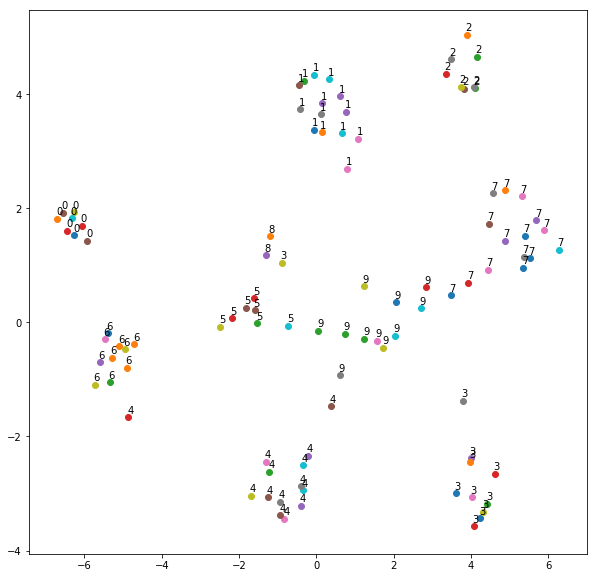

In [9]:
plot_with_labels(lowDWeights,mnist.test.labels[:100] )

# Project all images across epochs

In [10]:
all_weights = pr.parse_all()

In [155]:
epoch_weights = []

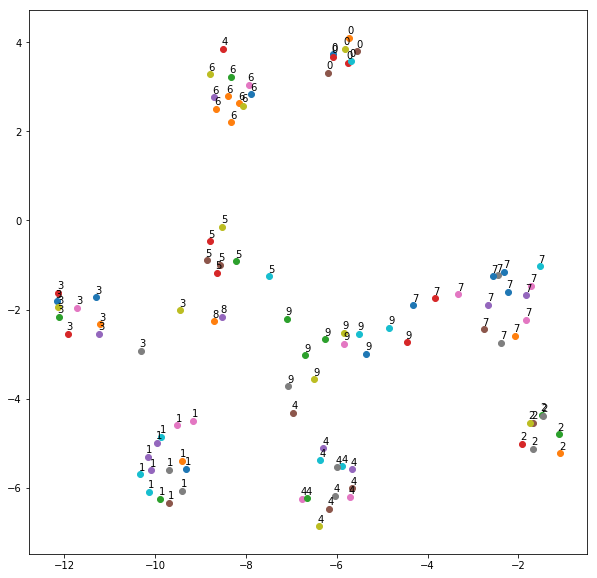

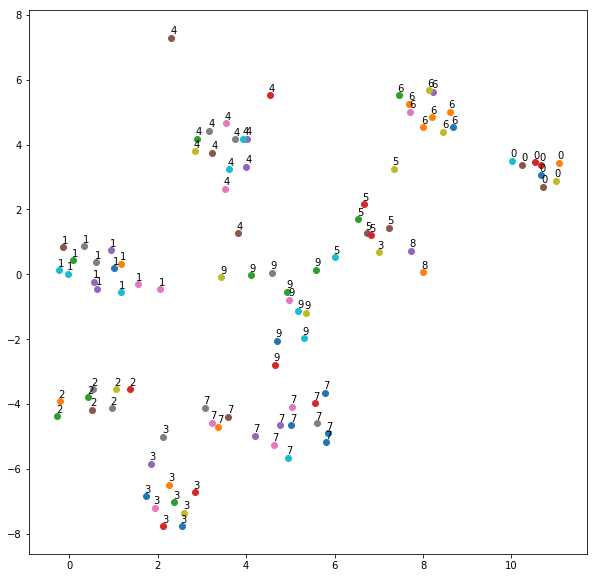

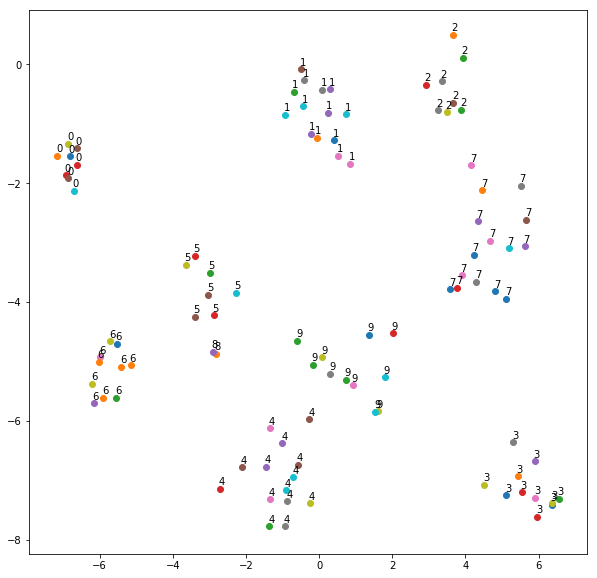

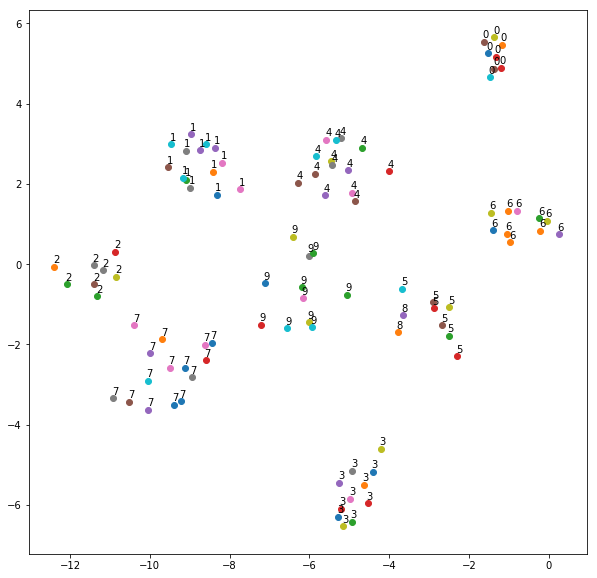

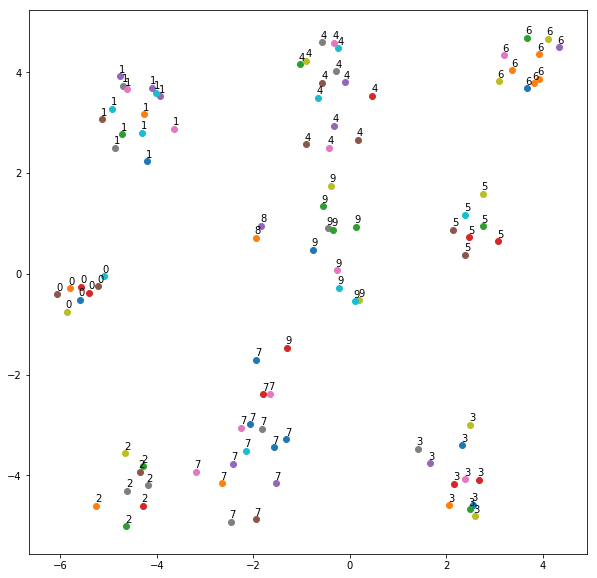

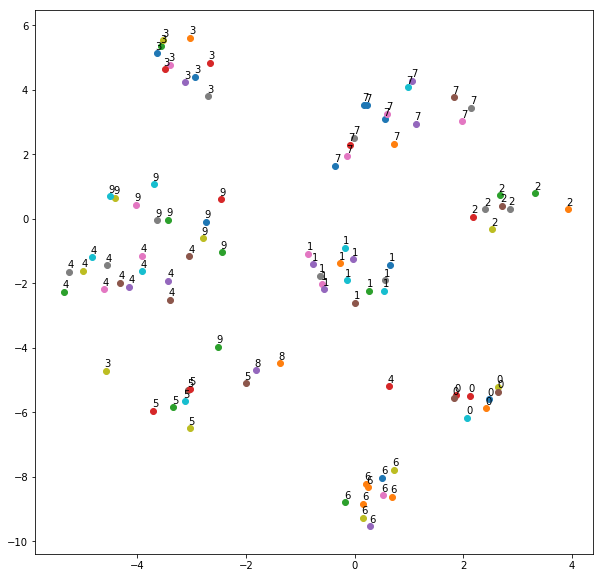

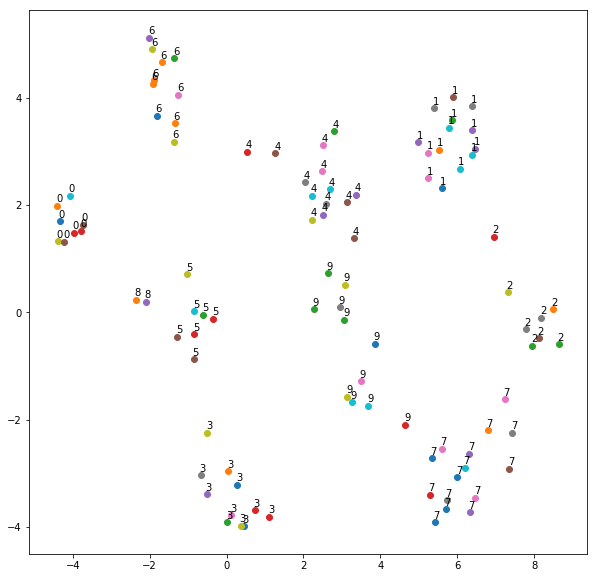

In [156]:
i=0
for w in all_weights:
    tsne = TSNE(perplexity=30, n_components=2, init="pca", n_iter=5000)
    lowDWeights = tsne.fit_transform(w)
    epoch_weights.append(lowDWeights)
#     print("%d to %d", i*100, i*100+100)
    plot_with_labels(lowDWeights, mnist.test.labels[:100])
#     plot_with_labels(lowDWeights, mnist.test.labels[i*100:(i*100 +100)], "epoch" + str(i) +".png")
    i+=1

In [166]:
#given a list of points, generates a matrix of distances 
def calc_distances(pts_lst): 
    dist_matrix = []
    for i in pts_lst: 
        pts = list(map(lambda x: np.linalg.norm(i-x), pts_lst))
        dist_matrix.append(pts)
    return np.array(dist_matrix)

In [167]:
distances = calc_distances(epoch_weights[0])

In [168]:
def kth_distances(pt_lst,k):
    sorted = np.sort(pt_lst)[1:k+1]
    pts = []
    for i in sorted: 
        pt_index = np.nonzero(pt_lst==i)
        if(len(pt_index)>1): raise Exception("same distances")
        else: pt_index = pt_index[0][0]
        pts.append({"pt":pt_index,"dist":i, "class":mnist.test.labels[pt_index]})
    return pts

In [169]:
print(mnist.test.labels[0])
kth_distances(distances[0], 6)

7


[{'pt': 34, 'dist': 0.4145537, 'class': 7},
 {'pt': 17, 'dist': 0.43842548, 'class': 7},
 {'pt': 70, 'dist': 0.45981055, 'class': 7},
 {'pt': 60, 'dist': 0.48036125, 'class': 7},
 {'pt': 64, 'dist': 0.5194752, 'class': 7},
 {'pt': 86, 'dist': 0.5307704, 'class': 7}]

In [175]:
def pt_ratio(nearest, i_label):
    s = 0.0
    for i in nearest: 
        if i["class"]==i_label: s+=1
    return s / len(nearest)

def n_ratio(projs, k):
    distances = calc_distances(projs)#matrix of distances
    sum_ratios = 0.0
    for i in range(len(distances)): 
        nearest = kth_distances(distances[i], k)
        i_label = mnist.test.labels[i]
        sum_ratios += pt_ratio(nearest, i_label)
    return sum_ratios / len(distances)

In [180]:
n_ratio(epoch_weights[0],6)

0.93

In [172]:
for i in epoch_weights:
    print(n_ratio(i))

0.93
0.915
0.9533333333333331
0.96
0.9566666666666666
0.93
0.9433333333333331
